<a href="https://colab.research.google.com/github/Ashutosh472/ADS/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### **Experiment 4**
###### **Name:**Ashutosh Kumar Mishra
###### **Roll No:**CS8A63
###### **Division:**A
###### **Subject:**Social Media Analytics
###### **DOP:**30/01/2023
###### **DOS:**
###### **Score:**
###### **Sign:**

###### **AIM:Perform exploratory data analysis and visualization of social media data for business.**


##### **DRIVE MOUNT**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd /content/drive/My Drive/IMPORTANT FILES DETAILS//Sem 8 Pratical Data/SMA/DataICCI/

###### **INSTALLING EMOJI AND LANGDETECT LIBRARY**

In [ ]:
!pip install emoji

In [ ]:
!pip install langdetect

###### **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
import regex
from collections import Counter
from langdetect import detect

###### **READING DATASET USING PANDAS**

In [ ]:
data=pd.read_csv("data_cleaned.csv")
df1=pd.read_csv("icci_twitter_insta.csv")

###### **PRINTING FIRST 5 ROWS OF THE DATASET**

In [ ]:
data.head()

,comments
0,claim issue month worst experience icici lomb...
1,love vashikaran specialist astrologer ...
2,finally gateway quick setup dead
3,disheartened unacceptable behavior denying med...
4,would like inform toyota etios car number gj ...


###### **PRINTING THE SHAPE OF THE DATASET IN (ROWS,COLUMNS) FROMAT**

In [ ]:
data.shape

(1538, 1)

###### **CREATING A HISTOGRAM USING SEABORN histplot() FUNCTION TO VISUALIZE THE DISTRIBUTION OF COMMENT LENGTH.**

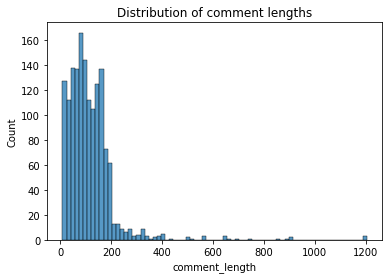

In [ ]:
data['comment_length'] = data['comments'].apply(len)
sns.histplot(x='comment_length', data=data)
plt.title('Distribution of comment lengths')
plt.show()

######  **CREATING A HISTOGRAM USING SEABORN'S DISPLOT() FUNCTION TO VISUALIZE THE DISTRIBUTION OF COMMENT LENGTHS. THE DATA['COMMENT_LENGTH'] SPECIFIES THAT THE 'COMMENT_LENGTH' COLUMN SHOULD BE USED AS THE INPUT DATA FOR THE HISTOGRAM. THE KDE PARAMETER SET TO TRUE ADDS A SMOOTHED LINE REPRESENTING THE KERNEL DENSITY ESTIMATION.**

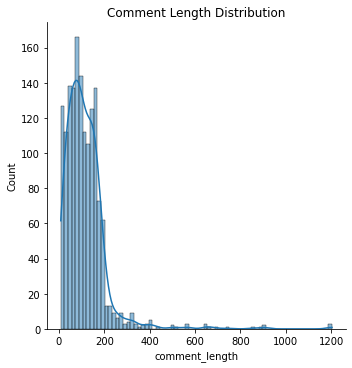

In [ ]:
data['comment_length'] = data['comments'].apply(len)
sns.displot(data['comment_length'], kde=True)
plt.title('Comment Length Distribution')
plt.show()

###### **CREATING A WORDCLOUD USING THE WORDCLOUD FUNCTION FROM THE WORDCLOUD LIBRARY. THE WIDTH AND HEIGHT PARAMETERS SPECIFY THE SIZE OF THE WORDCLOUD. THE BACKGROUND_COLOR PARAMETER SPECIFIES THE BACKGROUND COLOR OF THE WORDCLOUD. THE STOPWORDS PARAMETER SPECIFIES THE SET OF STOPWORDS THAT WILL BE REMOVED FROM THE TEXT BEFORE CREATING THE WORDCLOUD. THE MIN_FONT_SIZE PARAMETER SPECIFIES THE MINIMUM FONT SIZE OF THE WORDS IN THE WORDCLOUD. THE GENERATE() METHOD TAKES AS AN ARGUMENT THE JOINED 'COMMENTS' COLUMN TEXT FROM THE 'DATA' DATAFRAME.**

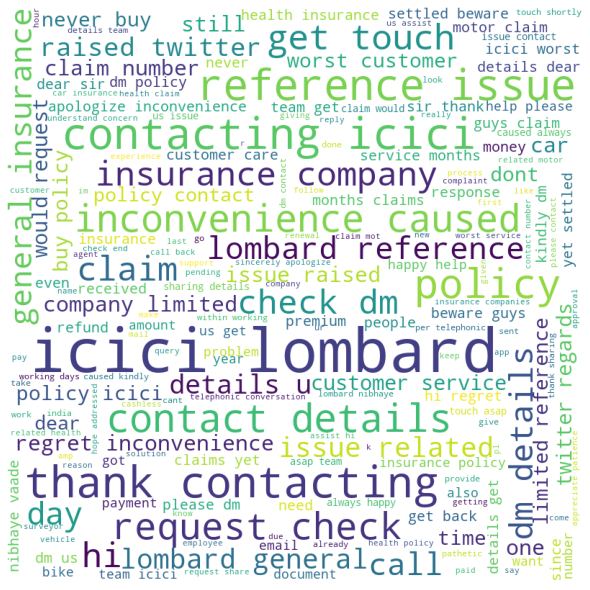

In [ ]:
stopwords = set(stopwords.words('english'))

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(' '.join(data['comments']))

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 


###### **ANALYZESING THE SENTIMENT OF EACH COMMENT IN THE 'COMMENTS' COLUMN OF THE 'DATA' DATAFRAME USING THE SENTIMENT.POLARITY PROPERTY OF THE TEXTBLOB CLASS FROM THE TEXTBLOB LIBRARY.THE APPLY() METHOD WITH A LAMBDA FUNCTION IS USED TO APPLY THE SENTIMENT.POLARITY PROPERTY TO EACH COMMENT TEXT IN THE 'COMMENTS' COLUMN AND STORE THE RESULTS IN A NEW COLUMN NAMED 'POLARITY'. THE 'POLARITY' SCORES RANGE FROM -1 (VERY NEGATIVE SENTIMENT) TO 1 (VERY POSITIVE SENTIMENT).**

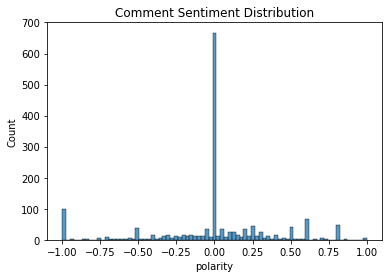

In [ ]:
from textblob import TextBlob

data['polarity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
sns.histplot(data['polarity'])
plt.title('Comment Sentiment Distribution')
plt.show()


###### **ANALYZESING THE SUBJECTIVITY OF EACH COMMENT IN THE 'COMMENTS' COLUMN OF THE 'DATA' DATAFRAME USING THE SENTIMENT.SUBJECTIVITY PROPERTY OF THE TEXTBLOB CLASS FROM THE TEXTBLOB LIBRARY.THE APPLY() METHOD WITH A LAMBDA FUNCTION IS USED TO APPLY THE SENTIMENT.SUBJECTIVITY PROPERTY TO EACH COMMENT TEXT IN THE 'COMMENTS' COLUMN AND STORE THE RESULTS IN A NEW COLUMN NAMED 'SUBJECTIVITY'. THE 'SUBJECTIVITY' SCORES RANGE FROM 0 (OBJECTIVE) TO 1 (SUBJECTIVE).**

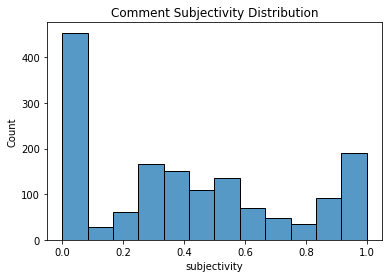

In [ ]:
data['subjectivity'] = data['comments'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
sns.histplot(data['subjectivity'])
plt.title('Comment Subjectivity Distribution')
plt.show()

###### **EXTRACTING HASHTAGS FROM COMMENTS IN THE 'COMMENTS' COLUMN OF A DATAFRAME NAMED 'df1', COUNTS THE FREQUENCY OF EACH HASHTAG, AND PLOTS A BAR CHART OF THE TOP 10 MOST FREQUENT HASHTAGS.**

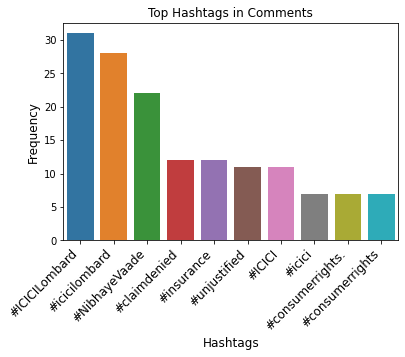

In [ ]:
hashtags = []

for comment in df1['comments']:
    comment_hashtags = [word for word in comment.split() if word.startswith('#')]
    if len(comment_hashtags) > 0:
        hashtags.extend(comment_hashtags)

hashtag_freq = pd.Series(hashtags).value_counts().head(10)
sns.barplot(x=hashtag_freq.index, y=hashtag_freq.values)
plt.title('Top Hashtags in Comments')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.xlabel('Hashtags', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

###### **EXTRACTING THE TOP 10 MENTIONS (USERS STARTING WITH '@' SYMBOL) FROM THE COMMENTS COLUMN OF THE DATAFRAME df1 AND PLOTS A BAR CHART SHOWING THE FREQUENCY OF EACH MENTION. THE CODE USES PANDAS TO CREATE A SERIES OF MENTIONS AND THEIR FREQUENCY COUNTS, AND SEABORN TO PLOT THE BAR CHART WITH PROPER LABELS AND ROTATION OF THE X-TICKS FOR BETTER READABILITY.**

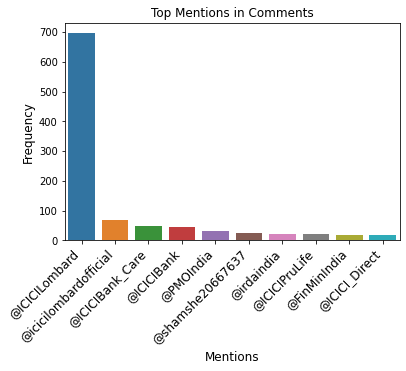

In [ ]:
mentions = []

for comment in df1['comments']:
    comment_mentions = [word for word in comment.split() if word.startswith('@')]
    if len(comment_mentions) > 0:
        mentions.extend(comment_mentions)

mention_freq = pd.Series(mentions).value_counts().head(10)
sns.barplot(x=mention_freq.index, y=mention_freq.values)
plt.title('Top Mentions in Comments')
plt.xticks(rotation=45, fontsize=12, ha='right')
plt.xlabel('Mentions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


###### **EXTRACTING EMOJIS FROM THE COMMENTS COLUMN OF A DATAFRAME AND CREATES A BAR PLOT SHOWING THE TOP 10 MOST FREQUENT EMOJIS USED IN THE COMMENTS. IT FIRST DEFINES A REGEX PATTERN TO MATCH EMOJIS, AND A HELPER FUNCTION TO EXTRACT EMOJIS FROM TEXT USING THE REGEX PATTERN. THEN IT APPLIES THE HELPER FUNCTION TO THE COMMENTS COLUMN TO CREATE A NEW COLUMN WITH THE EXTRACTED EMOJIS. NEXT, IT COUNTS THE FREQUENCY OF EACH EMOJI USING THE COUNTER FUNCTION FROM THE COLLECTIONS MODULE, AND CREATES A DATAFRAME WITH THE EMOJI COUNTS. FINALLY, IT CREATES A BAR PLOT OF THE TOP 10 MOST FREQUENT EMOJIS USING THE DATAFRAME.**

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128079 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128293 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128588 missing from current font.
  fon

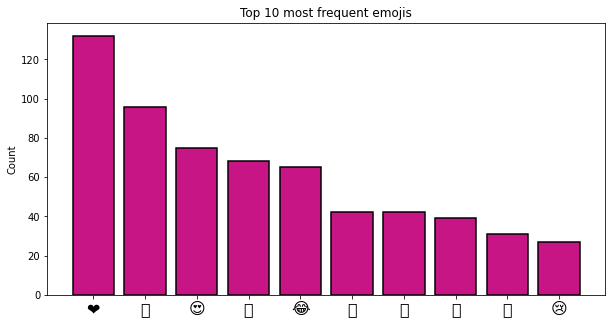

In [ ]:
# Define a regex pattern to match emojis
emoji_pattern = regex.compile('[\p{Emoji_Presentation}\p{Extended_Pictographic}]')

# Helper function to extract emojis from text
def extract_emojis(text):
    return ''.join(c for c in text if emoji_pattern.match(c))

# Extract emojis from the comments column
df1['emojis'] = df1['comments'].apply(extract_emojis)

# Count the frequency of each emoji
emojis = [c for emoji_str in df1['emojis'] for c in emoji_str]
emoji_count = Counter(emojis)

# Create a dataframe with the emoji counts
emoji_df = pd.DataFrame.from_dict(emoji_count, orient='index', columns=['count'])
emoji_df.sort_values('count', ascending=False, inplace=True)

# Plot the top 10 most frequent emojis
top_emojis = emoji_df.head(10).reset_index()
plt.figure(figsize=(10,5))
plt.bar(top_emojis['index'], top_emojis['count'], 
        color='mediumvioletred', edgecolor='black', linewidth=1.5, width=0.8)
plt.title('Top 10 most frequent emojis')
plt.ylabel('Count')
plt.xticks(fontsize=16)  # Adjust the font size of the x-tick labels
plt.show()

###### **USESING THE COUNTVECTORIZER CLASS FROM THE SKLEARN LIBRARY TO CONVERT THE TEXT DATA IN THE 'COMMENTS' COLUMN OF A DATAFRAME INTO A MATRIX OF TOKEN COUNTS. IT SETS THE 'NGRAM_RANGE' PARAMETER TO (2,2) TO EXTRACT BIGRAMS, AND FITS THE VECTORIZER TO THE DATA. THEN IT GETS THE MOST COMMON BIGRAMS USING THE 'GET_FEATURE_NAMES' METHOD, AND CALCULATES THEIR FREQUENCY USING THE 'TOARRAY' METHOD AND THE 'SUM' FUNCTION. IT CREATES A DATAFRAME WITH THE BIGRAM FREQUENCY INFORMATION AND PLOTS A BAR GRAPH OF THE TOP 10 MOST FREQUENT BIGRAMS.**

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


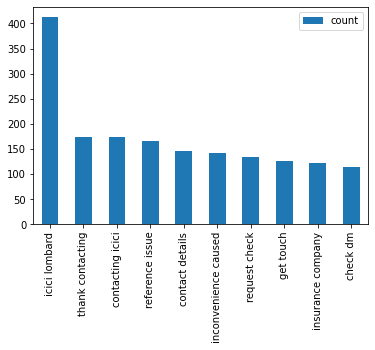

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(2, 2))
X = vectorizer.fit_transform(data['comments'])

# Get the most common n-grams
ngrams = vectorizer.get_feature_names()
count_values = X.toarray().sum(axis=0)
ngram_freq = dict(zip(ngrams, count_values))
ngram_df = pd.DataFrame.from_dict(ngram_freq, orient='index', columns=['count'])
ngram_df.sort_values('count', ascending=False, inplace=True)
ngram_df.head(10).plot(kind='bar')


###### **CREATING A KERNEL DENSITY ESTIMATION PLOT OF THE LENGTHS OF COMMENTS IN THE 'comments' COLUMN OF A DATAFRAME df1. THE LENGTH OF EACH COMMENT IS CALCULATED USING THE len() FUNCTION AND STORED IN A LIST. THE sns.kdeplot() FUNCTION IS THEN USED TO PLOT THE DISTRIBUTION OF COMMENT LENGTHS AS A SMOOTHED CURVE. THIS CODE ASSUMES THAT THE 'comments' COLUMN CONTAINS UNCLEANED DATA.**

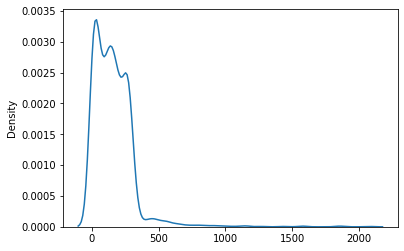

In [ ]:
# Assume 'comments' is a list of strings containing the comments
comment_lengths = [len(comment) for comment in df1['comments']]
sns.kdeplot(comment_lengths)
#not cleaned data

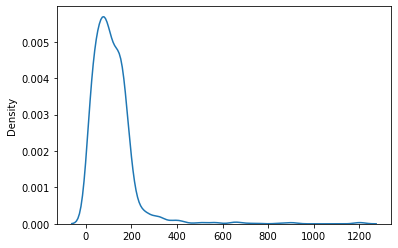

In [ ]:
# Assume 'comments' is a list of strings containing the comments
comment_lengths = [len(comment) for comment in data['comments']]
sns.kdeplot(comment_lengths)
#cleaned data

###### **CREATING A PIE CHART SHOWING THE PROPORTION OF POSITIVE, NEUTRAL, AND NEGATIVE COMMENTS BASED ON THEIR SENTIMENT POLARITY SCORES**

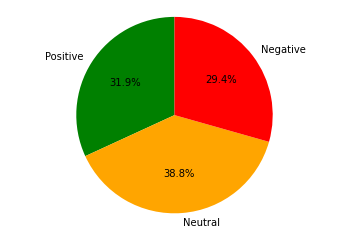

In [ ]:
# Assume 'comments' is a list of strings containing the comments, and 'polarities' is a list of sentiment polarity scores for each comment
df_pie = pd.DataFrame({'Comment': data['comments'], 'Polarity': data['polarity']})
positive_comments = df_pie[df_pie['Polarity'] > 0]
neutral_comments = df_pie[df_pie['Polarity'] == 0]
negative_comments = df_pie[df_pie['Polarity'] < 0]
sizes = [len(positive_comments), len(neutral_comments), len(negative_comments)]
labels = ['Positive', 'Neutral', 'Negative']
colors = ['green', 'orange', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

###### **CREATING A KERNEL DENSITY PLOT USING SEABORN TO VISUALIZE THE DISTRIBUTION OF SENTIMENT POLARITY SCORES IN THE 'POLARITY' COLUMN OF A DATAFRAME. THE PLOT IS SHADED AND COLORED BLUE. IT ALSO SETS THE TITLE, X-LABEL, AND Y-LABEL OF THE PLOT.**

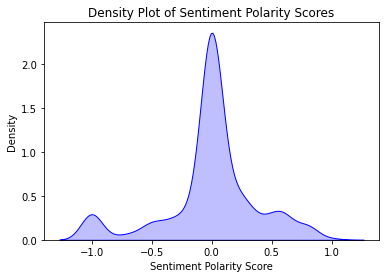

In [ ]:
sns.kdeplot(df_pie['Polarity'], shade=True, color='blue')
plt.title('Density Plot of Sentiment Polarity Scores')
plt.xlabel('Sentiment Polarity Score')
plt.ylabel('Density')
plt.show()